### Simulating BKT behavior

#### Import libraries

In [56]:
# Helpers
import numpy as np
# import pandas as pd

# Distance
from sklearn.metrics.pairwise import euclidean_distances

# Visualization
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns

%matplotlib inline

# Create student distribution

In [65]:
LABELS = ["Novice", "Advanced Beginner", "Competent"]
def create_student_distribution(std, n, levels=3):    
    plt.figure(figsize=(8,6))
    
    skill_thresolds = np.linspace(0,100,levels+1)
    skill_thresolds_shifted = np.roll(skill_thresolds,1)
    skill_mean = (skill_thresolds_shifted - skill_thresolds)/2 + skill_thresolds
    skill_std = (skill_mean - skill_thresolds_shifted)/std

    data = []
    for i in range(1, levels+1):
        data_skill = np.random.normal(skill_mean[i], skill_std[i], n) 
        data.append(data_skill)
#         plt.hist(data_skill, label=LABELS[i-1])
#         plt.xlabel("Skill acquisition stages")
        sns.distplot(data_skill, axlabel="Skill acquisition stages", label=LABELS[i-1]);
        plt.legend(prop={'size': 10})
    plt.show()
    return data
    
data = widgets.interactive(create_student_distribution, 
                 std= (0.1,5,0.1),
                 n=(1, 500,1), 
                 levels=(1,5,1))

display(data)

interactive(children=(FloatSlider(value=2.5000000000000004, description='std', max=5.0, min=0.1), IntSlider(va…

# Behavior 1:

**Input:** only one skill
**Expected output:** 


In [3]:
# Constants
# Initial learning state
L0 = 0
# Probability of transition
T = 0.1
# Probability of slip
S = 0.3
# Probability of guess
G = 0.3

In [4]:
def correct(learning_state):
#     global S
#     S = 0.4 * learning_state[5] + 0.1
#     print(S)
#     global G
#     G = -0.3 * learning_state[5] + 0.4
    learning_correct = learning_state * (1 - S)
    guess_correct = ((1 - learning_state) * G)
    learning_evidence = learning_correct/(learning_correct + guess_correct)
    return learning_evidence

def incorrect(learning_state):
#     global S
#     S = 0.4 * learning_state[5] + 0.1
#     print("inc")
#     print(S)
#     global G
#     G = -0.3 * learning_state[5] + 0.4
    learning_incorrect = learning_state * S
    guess_incorrect = ((1 - learning_state) * (1 - G))
    learning_evidence = learning_incorrect/(learning_incorrect + guess_incorrect)
    return learning_evidence
    
def update(learning_state, distribution, iscorrect=True):
    if iscorrect:
        learning_evidence = correct(learning_state)
    else:
        learning_evidence = incorrect(learning_state)
#     print("Learning evidence: %s" % (learning_evidence*100//1))
    learning_state = learning_evidence + ((1 - learning_evidence) * T * distribution)
    return learning_state

In [5]:
def update_learning(b):
    try:
        idx, distribution, outcome = next(l)
    except StopIteration:
        label_finished.value = "Finished"
    
    label_submission.value = "Submission " + str(idx+1)
    if outcome == "Passed":
        layout=widgets.Layout(border='1px solid green')
    else:
        layout=widgets.Layout(border='1px solid red')
    label_outcome.value = "Outcome: %s" % outcome
    label_outcome.layout = layout
    
    # Topic 6: simple math
    simple_math.value = distribution[5]*100//1
    label_simple_math.value = str(simple_math.value)
    # Topic 8: conditional
    conditional.value = distribution[7]*100//1
    label_conditional.value = str(conditional.value)
    # Topic 12: loop 
    loop.value = distribution[11]*100//1
    label_loop.value = str(loop.value)
    # Topic 10: list manipulation
    list_manipulation.value = distribution[9]*100//1
    label_list_manipulation.value = str(list_manipulation.value)
    # Topics 2 and 4: string
    string.value = (distribution[1] + distribution[3])*100//1
    label_string.value = str(string.value)
    
def go_to_next_passed(b):
    outcome = "Failed"
    
    try:
        while outcome != "Passed":
            idx, distribution, outcome = next(l)
    except StopIteration:
        label_finished.value = "Finished"

    label_submission.value = "Submission " + str(idx+1)
    if outcome == "Passed":
        layout=widgets.Layout(border='1px solid green')
    else:
        layout=widgets.Layout(border='1px solid red')
    label_outcome.value = "Outcome: " + outcome
    label_outcome.layout = layout
    
    # Topic 6: simple math
    simple_math.value = distribution[5]*100//1
    label_simple_math.value = str(simple_math.value)
    # Topic 8: conditional
    conditional.value = distribution[7]*100//1
    label_conditional.value = str(conditional.value)
    # Topic 12: loop 
    loop.value = distribution[11]*100//1
    label_loop.value = str(loop.value)
    # Topic 10: list manipulation
    list_manipulation.value = distribution[9]*100//1
    label_list_manipulation.value = str(list_manipulation.value)
    # Topics 2 and 4: string
    string.value = (distribution[1] + distribution[3])*100//1
    label_string.value = str(string.value)
    
def go_to_last(b):
    try:
        while True:
            idx, distribution, outcome = next(l)
    except StopIteration:
        label_finished.value = "Finished"

    label_submission.value = "Submission " + str(idx+1)
    if outcome == "Passed":
        layout=widgets.Layout(border='1px solid green')
    else:
        layout=widgets.Layout(border='1px solid red')
    label_outcome.value = "Outcome: " + outcome
    label_outcome.layout = layout
    
    # Topic 6: simple math
    simple_math.value = distribution[5]*100//1
    label_simple_math.value = str(simple_math.value)
    # Topic 8: conditional
    conditional.value = distribution[7]*100//1
    label_conditional.value = str(conditional.value)
    # Topic 12: loop 
    loop.value = distribution[11]*100//1
    label_loop.value = str(loop.value)
    # Topic 10: list manipulation
    list_manipulation.value = distribution[9]*100//1
    label_list_manipulation.value = str(list_manipulation.value)
    # Topics 2 and 4: string
    string.value = (distribution[1] + distribution[3])*100//1
    label_string.value = str(string.value)
    
def calculate_learning_state():
    l = np.zeros((12,))
    for idx in range(N_exercises):
        # Draw if user gets it correctly or not
        outcome = np.random.binomial(1, success_rate)
#         print("Submission #%d: %s" %(idx+1, outcome))
        distribution = np.zeros((12,))
        distribution[5] = 1
#         distribution[11] = 0.5
        if outcome:
            outcome = "Passed"
            l = update(l, distribution, True)
        else:
            outcome = "Failed"
            l = update(l, distribution, False)
#         print("Learning state: %s" % (l*100//1))
        yield idx, l, outcome

In [6]:
button = widgets.Button(description="Update learning state")
display(button)
button.on_click(update_learning)

button_next_p = widgets.Button(description="Next passed state")
display(button_next_p)
button_next_p.on_click(go_to_next_passed)

button_end = widgets.Button(description="Go to last")
display(button_end)
button_end.on_click(go_to_last)

label_finished = widgets.Label(value='')
display(label_finished)

# Towidgets.pics/Cowidgets.ncepts
simple_math = widgets.FloatProgress(min=0, max=100,  bar_style='info', description="Simple Math")
conditional = widgets.FloatProgress(min=0, max=100,  bar_style='warning', description="Conditional")
loop = widgets.FloatProgress(min=0, max=100,  bar_style='danger', description="Loop")
list_manipulation = widgets.FloatProgress(min=0, max=100,  bar_style='success', description="List Manipulation")
string = widgets.FloatProgress(min=0, max=100,  bar_style='', description="String")

# Labels
label_submission = widgets.Label(value="Submission "+str(0))
style = {'border': 'solid', "border-color": "black"}
label_outcome = widgets.Label(value="Outcome:")
label_simple_math = widgets.Label(value=str(0))
label_conditional = widgets.Label(value=str(0))
label_loop = widgets.Label(value=str(0))
label_list_manipulation = widgets.Label(value=str(0))
label_string = widgets.Label(value=str(0))

display(label_submission)
display(label_outcome)
display(widgets.HBox([simple_math, label_simple_math]))
display(widgets.HBox([conditional, label_conditional]))
display(widgets.HBox([loop, label_loop]))
display(widgets.HBox([list_manipulation, label_list_manipulation]))
display(widgets.HBox([string, label_string]))

N_exercises = 100
success_rate = 0.45
l = calculate_learning_state()

Button(description='Update learning state', style=ButtonStyle())

Button(description='Next passed state', style=ButtonStyle())

Button(description='Go to last', style=ButtonStyle())

Label(value='')

Label(value='Submission 0')

Label(value='Outcome:')

In [7]:
%%time
N_experiments = 150
success_rate_list = np.arange(0,1.01,0.05)
S_list = np.arange(0.05, 1.01, 0.05)
# end_state_avg = []
# end_state_std = []
S_end_state_avg = []
S_end_state_std = []
# end_S = []
# end_G = []
# end_S_avg = []
# end_S_std = []
# end_G_avg = []
# end_G_std = []
for S in S_list:
    end_state_avg = []
    end_state_std = []
    for success_rate in success_rate_list:
        end_state = []
        for item in range(N_experiments):
            l = list(calculate_learning_state())
            end_state.append(l[-1][1][5])
#         end_S.append(S)
#         end_G.append(G)
        end_state_avg.append(np.mean(np.asarray(end_state)))
        end_state_std.append(np.std(np.asarray(end_state)))
    S_end_state_avg.append(end_state_avg)
    S_end_state_std.append(end_state_std)
#     end_S_avg.append(np.mean(np.asarray(end_S)))
#     end_S_std.append(np.std(np.asarray(end_S)))
#     end_G_avg.append(np.mean(np.asarray(end_G)))
#     end_G_std.append(np.std(np.asarray(end_G)))

CPU times: user 1min 22s, sys: 732 ms, total: 1min 23s
Wall time: 1min 22s


### Testing how changing S changes the final learning curve

In [31]:
%%time
T = 0.1
G = 0.7
N_experiments = 150
success_rate_list = np.arange(0,1.01,0.05)
S_list = np.arange(0.05, 1.01, 0.05)
S_end_state_avg = []
S_end_state_std = []

for S in S_list:
    end_state_avg = []
    end_state_std = []
    for success_rate in success_rate_list:
        end_state = []
        for item in range(N_experiments):
            l = list(calculate_learning_state())
            end_state.append(l[-1][1][5])
        end_state_avg.append(np.mean(np.asarray(end_state)))
        end_state_std.append(np.std(np.asarray(end_state)))
    S_end_state_avg.append(end_state_avg)
    S_end_state_std.append(end_state_std)

CPU times: user 1min 22s, sys: 680 ms, total: 1min 22s
Wall time: 1min 22s


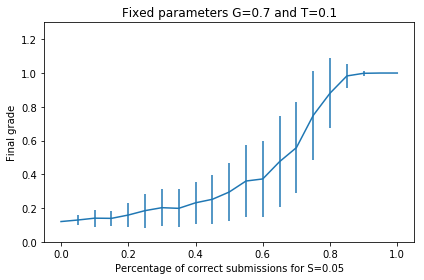

In [32]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)

def update_S(i):
    label = "S=%.2f" % S_list[i]
#     print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    ax.clear()
    ax.set_ylim([0, 1.3])
    ax.set_title("Fixed parameters G=%.1f and T=%.1f" % (G, T))
    ax.set_xlabel("Percentage of correct submissions for %s" % label)
    ax.set_ylabel("Final grade")

    ax.errorbar(success_rate_list, S_end_state_avg[i], yerr=S_end_state_std[i])
    return ax

ani = FuncAnimation(fig, update_S, frames=len(S_end_state_avg), interval=300)
a = ani.save('slip_effect.gif', dpi=80, writer='imagemagick')
HTML(ani.to_html5_video())

### Testing how changing G changes the final learning curve

In [33]:
%%time
T = 0.1
S = 0.05
N_experiments = 150
success_rate_list = np.arange(0,1.01,0.05)
G_list = np.arange(0.05, 1.01, 0.05)
G_end_state_avg = []
G_end_state_std = []

for G in G_list:
    end_state_avg = []
    end_state_std = []
    for success_rate in success_rate_list:
        end_state = []
        for item in range(N_experiments):
            l = list(calculate_learning_state())
            end_state.append(l[-1][1][5])
        end_state_avg.append(np.mean(np.asarray(end_state)))
        end_state_std.append(np.std(np.asarray(end_state)))
    G_end_state_avg.append(end_state_avg)
    G_end_state_std.append(end_state_std)

CPU times: user 1min 25s, sys: 1.55 s, total: 1min 27s
Wall time: 1min 25s


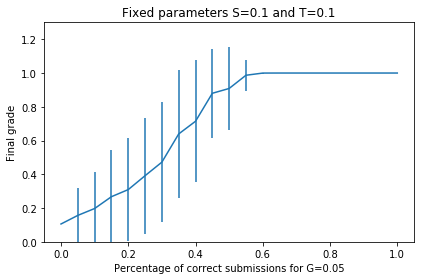

In [34]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)

def update_G(i):
    label = "G=%.2f" % G_list[i]
#     print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    ax.clear()
    ax.set_ylim([0, 1.3])
    ax.set_title("Fixed parameters S=%.1f and T=%.1f" % (S, T))
    ax.set_xlabel("Percentage of correct submissions for %s" % label)
    ax.set_ylabel("Final grade")

    ax.errorbar(success_rate_list, G_end_state_avg[i], yerr=G_end_state_std[i])
    return ax

ani = FuncAnimation(fig, update_G, frames=len(G_end_state_avg), interval=300)
a = ani.save('guess_effect.gif', dpi=80, writer='imagemagick')
HTML(ani.to_html5_video())

In [35]:
%%time
G = 0.85
S = 0.05
N_experiments = 150
success_rate_list = np.arange(0,1.01,0.05)
T_list = np.arange(0.05, 1.01, 0.05)
T_end_state_avg = []
T_end_state_std = []

for T in T_list:
    end_state_avg = []
    end_state_std = []
    for success_rate in success_rate_list:
        end_state = []
        for item in range(N_experiments):
            l = list(calculate_learning_state())
            end_state.append(l[-1][1][5])
        end_state_avg.append(np.mean(np.asarray(end_state)))
        end_state_std.append(np.std(np.asarray(end_state)))
    T_end_state_avg.append(end_state_avg)
    T_end_state_std.append(end_state_std)

CPU times: user 1min 22s, sys: 424 ms, total: 1min 22s
Wall time: 1min 22s


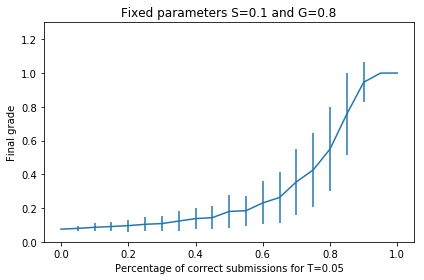

In [37]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)

def update_T(i):
    label = "T=%.2f" % T_list[i]
#     print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    ax.clear()
    ax.set_ylim([0, 1.3])
    ax.set_title("Fixed parameters S=%.1f and G=%.1f" % (S, G))
    ax.set_xlabel("Percentage of correct submissions for %s" % label)
    ax.set_ylabel("Final grade")

    ax.errorbar(success_rate_list, T_end_state_avg[i], yerr=T_end_state_std[i])
    return ax

ani = FuncAnimation(fig, update_T, frames=len(T_end_state_avg), interval=300)
a = ani.save('transition_effect.gif', dpi=80, writer='imagemagick')
HTML(ani.to_html5_video())

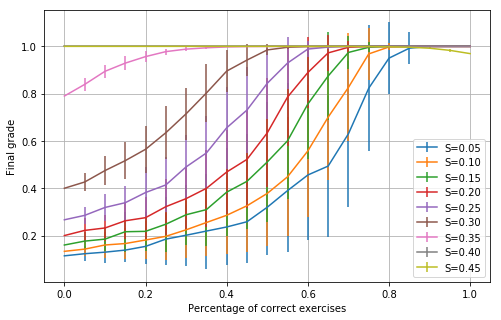

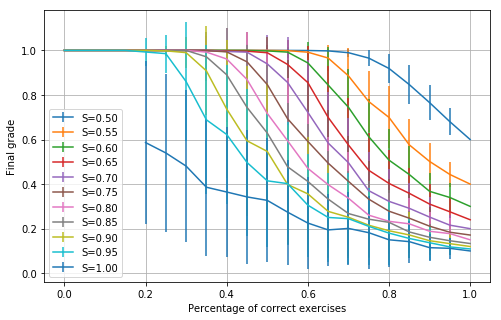

In [388]:
plt.figure(figsize=(8,5))
for idx in range(len(S_end_state_avg)//2-1):
#     print(len(avgs))
    plt.errorbar(success_rate_list, S_end_state_avg[idx], yerr=S_end_state_std[idx], label="S=%.2f" % S_list[idx])
# plt.title("Final grade after %d exercises with parameters S=%.1f%%, G=%.1f%% and T=%.1f%%" % (N_exercises, S, G, T))
plt.xlabel("Percentage of correct exercises")
plt.ylabel("Final grade")
plt.grid(True)
plt.legend()

plt.figure(figsize=(8,5))
for idx in range(len(S_end_state_avg)//2-1, len(S_end_state_avg)):
#     print(len(avgs))
    plt.errorbar(success_rate_list, S_end_state_avg[idx], yerr=S_end_state_std[idx], label="S=%.2f" % S_list[idx])
# plt.title("Final grade after %d exercises with parameters S=%.1f%%, G=%.1f%% and T=%.1f%%" % (N_exercises, S, G, T))
plt.xlabel("Percentage of correct exercises")
plt.ylabel("Final grade")
plt.grid(True)
plt.legend()

plt.show()

In [446]:
# Constants
# Initial learning state
L0 = 0
# Probability of transition
T = 0.1
# Probability of slip
S = 0.3
# Probability of guess
G = 0.3

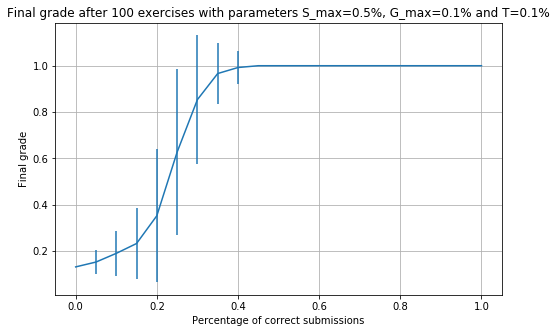

In [347]:
plt.figure(figsize=(8,5))
plt.errorbar(success_rate_list, end_state_avg, yerr=end_state_std)
plt.title("Final grade after %d exercises with parameters S_max=%.1f%%, G_max=%.1f%% and T=%.1f%%" % (N_exercises, S, G, T))
plt.xlabel("Percentage of correct submissions")
plt.ylabel("Final grade")
plt.grid(True)
plt.show()

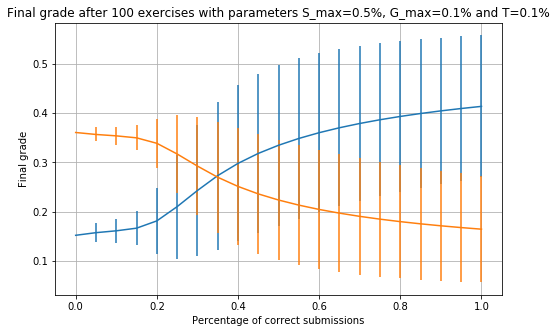

In [349]:
plt.figure(figsize=(8,5))
plt.errorbar(success_rate_list, end_S_avg, yerr=end_S_std)
plt.errorbar(success_rate_list, end_G_avg, yerr=end_G_std)
plt.title("Final grade after %d exercises with parameters S_max=%.1f%%, G_max=%.1f%% and T=%.1f%%" % (N_exercises, S, G, T))
plt.xlabel("Percentage of correct submissions")
plt.ylabel("Final grade")
plt.grid(True)
plt.show()

In [249]:
from questions.models import UserLog

In [289]:
user = ["lmoraes", "laurinhamoraes@gmail.com"]
u = User.objects.filter(username__in=user)
ul_total = UserLog.objects.exclude(user__in=u).values("outcome", "problem").annotate(num=Count("outcome"))
# ul_passed = ul_total.filter(outcome="P")
# ul_failed = ul_total.filter(outcome="F")
# ul_skipped = ul_total.filter(outcome="S")

# print("Total: %d" % ul.count())
# print("Total passed: %d (%.2f)" % (ul_passed.count(), ul_passed.count()/ul_total.count()))
# print("Total failed: %d (%.2f)" % (ul_failed.count(), ul_failed.count()/ul_total.count()))
# print("Total skipped: %d (%.2f)" % (ul_skipped.count(), ul_skipped.count()/ul_total.count()))
from collections import defaultdict
outcome_dict = defaultdict(dict)
for item in ul_total:
    outcome_dict[item["problem"]][item["outcome"]] = item['num']
    
outcome_dict_avg = defaultdict(dict)
for key,value in outcome_dict.items():
    try:
        outcome_dict_avg[key]["pavg"] = value["P"]/(value["P"]+value["F"]+value["S"])
        outcome_dict_avg[key]["favg"] = value["F"]/(value["P"]+value["F"]+value["S"])
        outcome_dict_avg[key]["savg"] = value["S"]/(value["P"]+value["F"]+value["S"])
        outcome_dict_avg[key]["d"] = 1 - outcome_dict_avg[key]["pavg"]/outcome_dict_avg[key]["favg"]
    except KeyError:
        print("Problem %s" % key)

Problem 121
Problem 129
Problem 84
Problem 113
Problem 130


In [292]:
0.2/0.85

0.23529411764705885

In [290]:
outcome_dict_avg

defaultdict(dict,
            {109: {'pavg': 0.11864406779661017,
              'favg': 0.8305084745762712,
              'savg': 0.05084745762711865,
              'd': 0.8571428571428572},
             105: {'pavg': 0.3877551020408163,
              'favg': 0.5102040816326531,
              'savg': 0.10204081632653061,
              'd': 0.24},
             124: {'pavg': 0.05660377358490566,
              'favg': 0.660377358490566,
              'savg': 0.2830188679245283,
              'd': 0.9142857142857143},
             41: {'pavg': 0.18181818181818182,
              'favg': 0.7402597402597403,
              'savg': 0.07792207792207792,
              'd': 0.7543859649122807},
             75: {'pavg': 0.13636363636363635,
              'favg': 0.6136363636363636,
              'savg': 0.25,
              'd': 0.7777777777777778},
             126: {'pavg': 0.5333333333333333,
              'favg': 0.26666666666666666,
              'savg': 0.2,
              'd': -1.0},
        

In [282]:
outcome_dict

defaultdict(dict,
            {109: {'P': 7, 'S': 3, 'F': 49},
             105: {'F': 25, 'P': 19, 'S': 5},
             124: {'F': 35, 'P': 3, 'S': 15},
             41: {'F': 57, 'P': 14, 'S': 6},
             75: {'F': 27, 'P': 6, 'S': 11},
             126: {'S': 3, 'P': 8, 'F': 4},
             76: {'P': 6, 'S': 44, 'F': 42},
             20: {'P': 25, 'S': 14, 'F': 36},
             7: {'F': 14, 'P': 14, 'S': 10},
             114: {'F': 18, 'P': 1, 'S': 2},
             69: {'P': 2, 'S': 9, 'F': 29},
             5: {'F': 47, 'P': 6, 'S': 6},
             11: {'S': 4, 'P': 8, 'F': 23},
             3: {'S': 10, 'P': 20, 'F': 14},
             15: {'P': 8, 'S': 8, 'F': 43},
             131: {'S': 3, 'P': 16, 'F': 5},
             28: {'P': 29, 'S': 11, 'F': 39},
             64: {'F': 15, 'P': 8, 'S': 2},
             132: {'S': 3, 'P': 5, 'F': 3},
             118: {'F': 218, 'P': 94, 'S': 43},
             68: {'F': 16, 'P': 11, 'S': 2},
             14: {'P': 7, 'S': 6, 'F':

In [3]:
import seaborn as sns

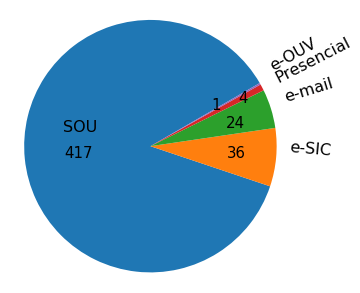

In [103]:
import matplotlib.pyplot as plt
import math
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SOU', 'e-SIC', 'e-mail', 'Presencial', 'e-OUV'
sizes = [417,36,24,4,1]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
l = ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
for label, t in zip(labels, l[1]):
    x, y = t.get_position()
    angle = int(math.degrees(math.atan2(y, x)))
    if label == "SOU":
        angle = 0
        x += 0.4
        y += 0.2
    if label == "e-OUV":
        y += 0.03
        x -= 0.03
    if label == "Presencial":
        y-= 0.03
    plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va=va, size=16)
i=0
for label, t in zip(labels, l[2]):
    x, y = t.get_position()
    angle = int(math.degrees(math.atan2(y, x)))
    if label == "SOU":
        x += 0.03
    if label == "e-OUV":
        y += 0.03
#         x -= 0.01
    if label == "Presencial":
        y += 0.1
        x += 0.2
    if label == "e-mail":
#         y-= 0.01
        x+=0.1
    if label == "e-SIC":
        x+=0.08
    t.set_position((x,y))
    t.set_size(15)
    t.set_text("{}".format(sizes[i]))
    i+=1
#     plt.annotate(t._text, xy=(x,y), rotation=angle, ha=ha, va=va, size=12)
plt.show()